In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.environ["PYQULAROOT"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'coolwarm'

import numpy as np

# Electronic structure of graphene
Here we will first compute the electronic structure of graphene, modeled with a single orbital per site

## Infinite two-dimensional graphene
First, we will consider a two-dimensional honeycomb lattice that is infinite in both directions

(-8.8, 8.8, -4.763139720814412, 4.763139720814412)

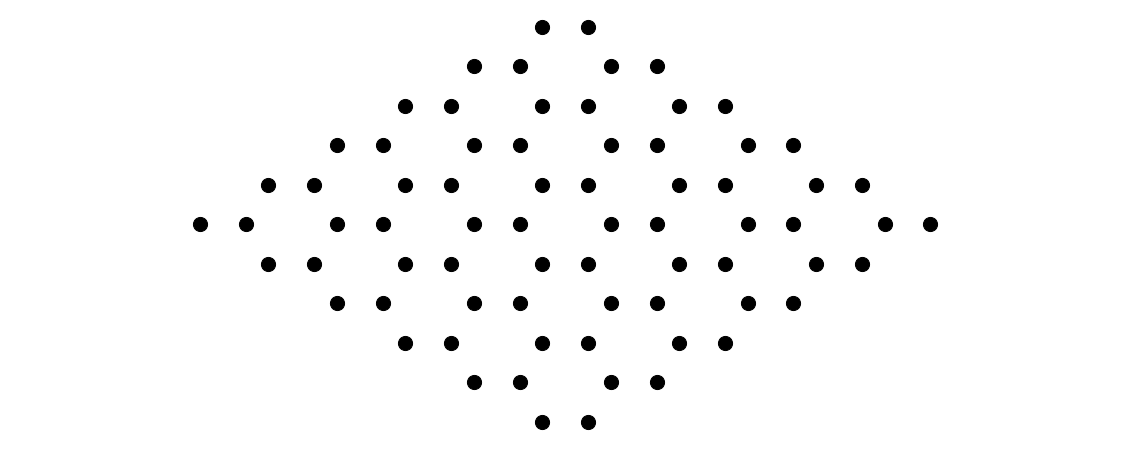

In [2]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
gs = g.get_supercell((6,6)) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

([], [])

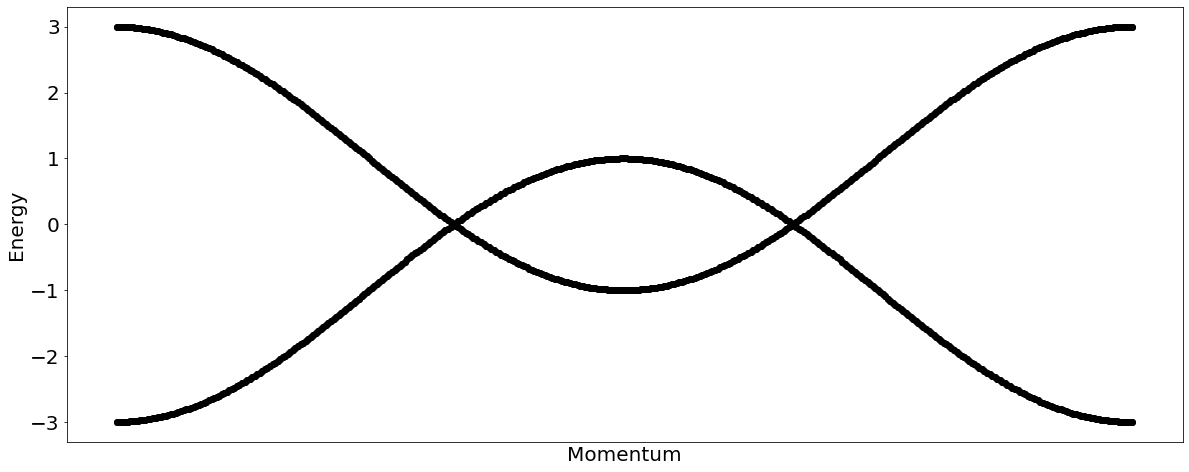

In [3]:
# now compute the band structure
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

([], [])

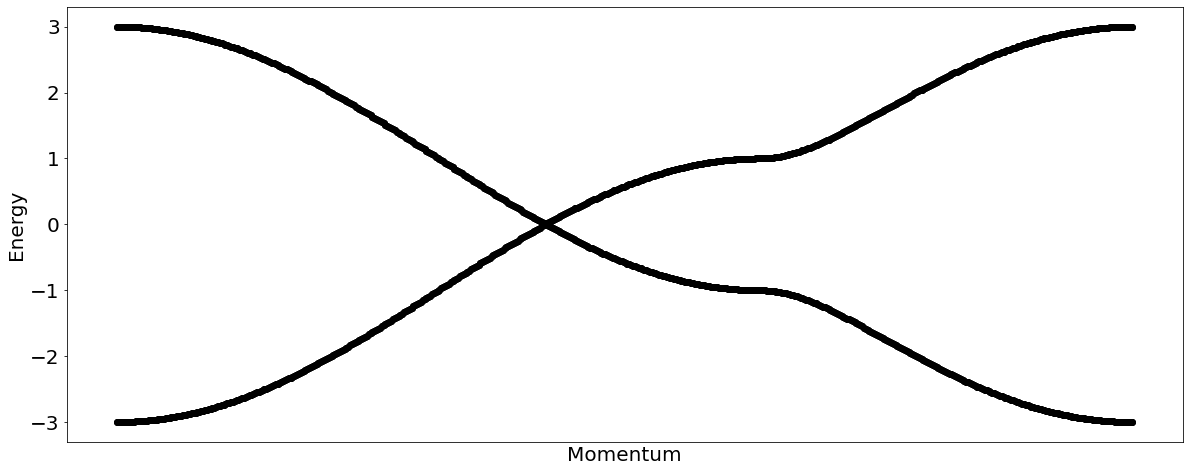

In [4]:
# we can also compute the band structure in a different kpath
(k,e) = h.get_bands(kpath=["G","K","M","G"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

Text(0, 0.5, 'DOS')

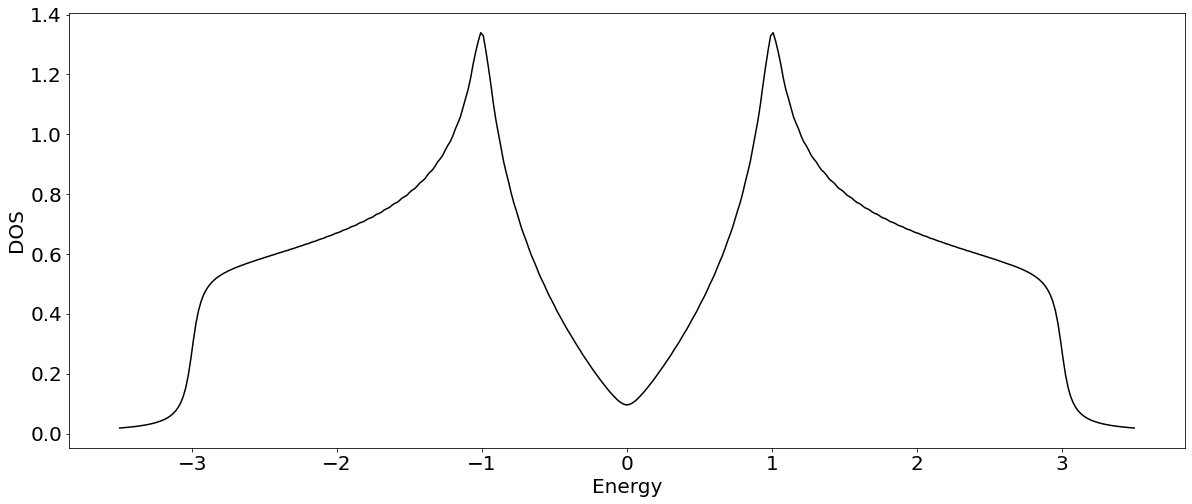

In [5]:
(e,d) = h.get_dos(delta=5e-2,energies=np.linspace(-3.5,3.5,400)) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot

## Graphene nanoribbons
We now focus on considering nanoribbons, systems with a finite width and infinite in the x-direction

(-32.725, 32.725, -9.049965469547384, 9.049965469547384)

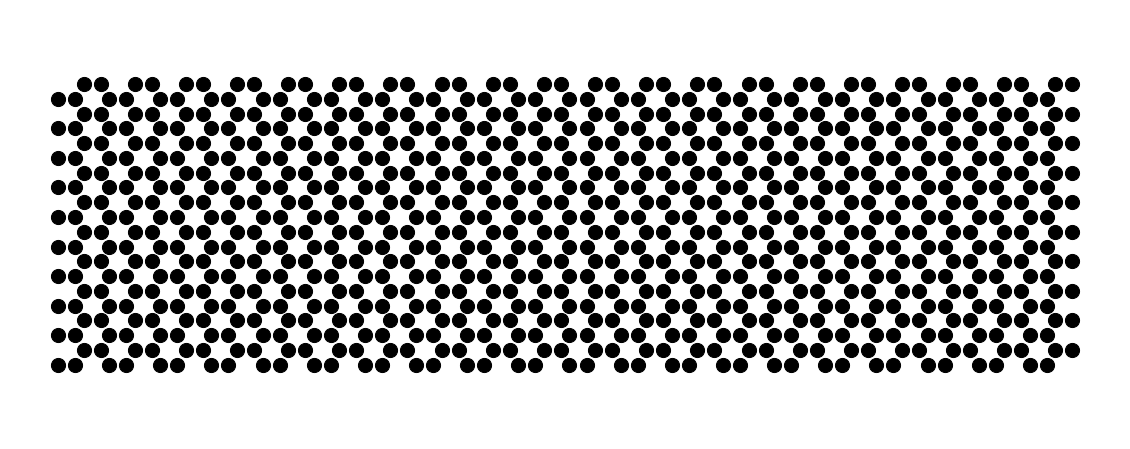

In [6]:
g = geometry.honeycomb_armchair_ribbon(10) # generate a honeycomb lattice
gs = g.get_supercell(20) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

([], [])

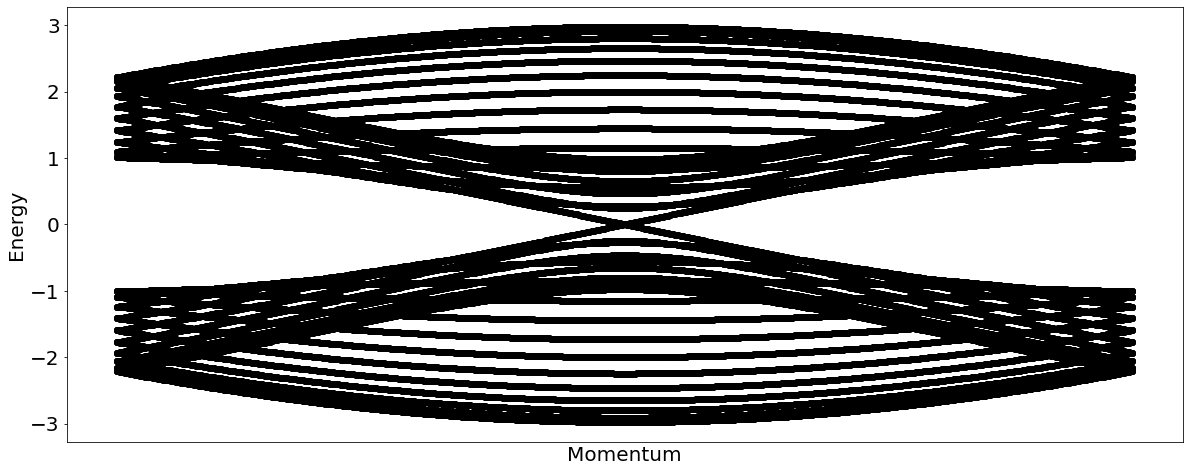

In [7]:
# now compute the band structure
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands(kpath=["M","G","M"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

Now we will compute the density of states of graphene nanoribbon, and see that it resembles the one of two simensional graphene

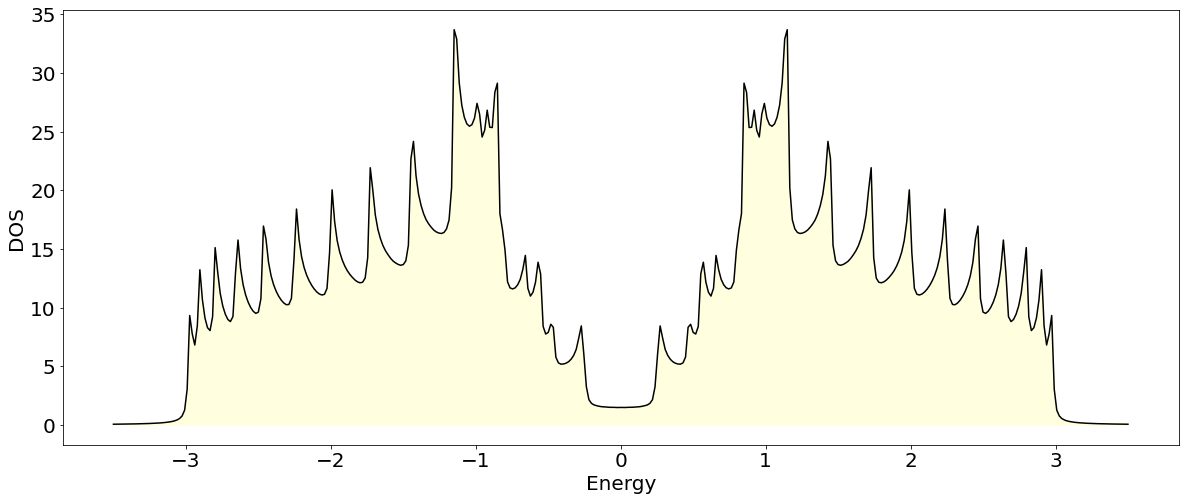

In [8]:
(e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400),nk=300) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

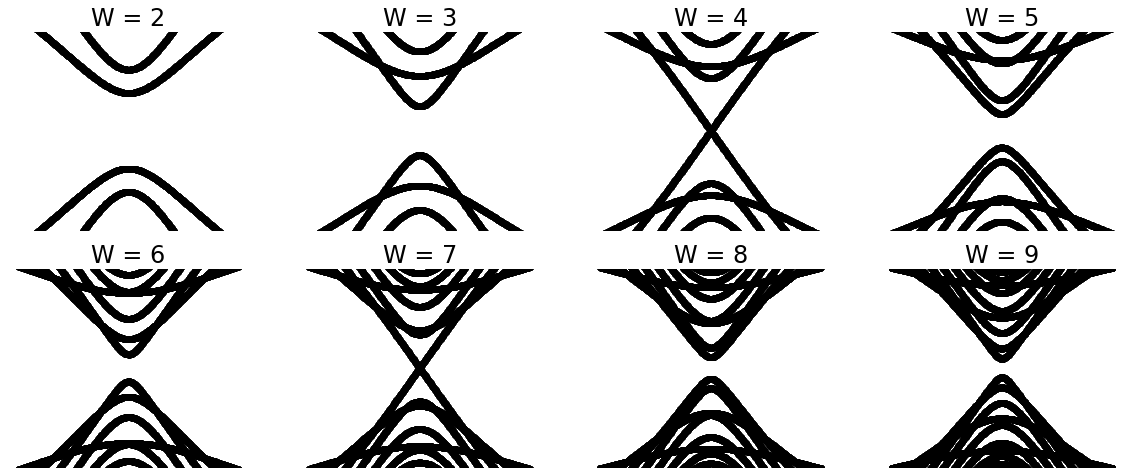

In [9]:
# plot the bands for different widths
ns = range(2,10,1) # widths
ij = 0 # counter
for n in ns: # loop over widths
    g = geometry.honeycomb_armchair_ribbon(n) # generate ribbon
    h = g.get_hamiltonian() # get the Hamiltonian
    (k,e) = h.get_bands(kpath=["M","G","M"]) # compute the bands
    plt.subplot(len(ns)//4,4,ij+1) ; ij +=1 
    plt.scatter(k,e,c="black") ; plt.axis("off") ; plt.ylim([-1,1]) ; plt.title("W = "+str(n)) # plot

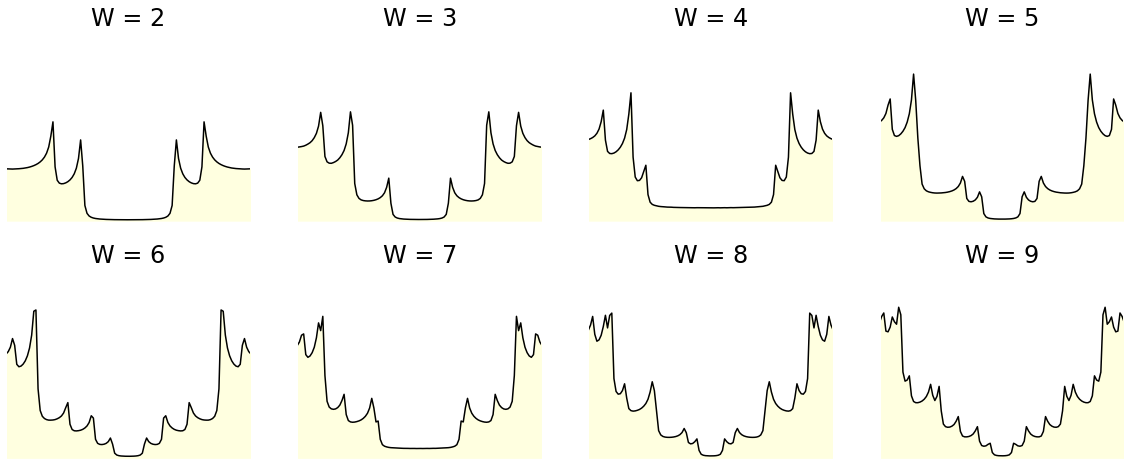

In [10]:
# plot the DOS for different widths
ns = range(2,10,1) # widths
ij = 0 # counter
for n in ns: # loop over widths
    g = geometry.honeycomb_armchair_ribbon(n) # generate ribbon
    h = g.get_hamiltonian() # get the Hamiltonian
    (e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400),nk=300) # DOS
    plt.subplot(len(ns)//4,4,ij+1) ; ij +=1 
    plt.plot(e,d,c="black") ; plt.axis("off") ; plt.xlim([-1,1]) ; plt.title("W = "+str(n)) # plot
    plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background